# Homework 2: Tree-based Models

## 2. Programming Questions

### Part A - Classification Tree (50 points)

In this problem, you will be coding up a classification tree from scratch. Trees are a special
class of graphs with only directed edges without any cycles. They fall under the category of
directed acyclic graphs or DAGs. So, trees are DAGs where each child node has only one parent
node.

Since trees are easy to design recursively, it is super important that you are familiar with
recursion. So, it is highly recommended that you brush up on recursion and tree-based search
algorithms such as depth-first search (DFS) and breadth-first search (BFS).
The figure below shows the growth of a tree to a maximum depth of seven on a two-class
classification dataset.



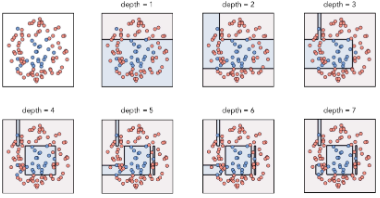

As the tree grows, note how many parts of the input space do not change as leaves on
the deeper branches become pure. By the time we reach a maximum depth of seven, there is
considerable overfitting.

Our dataset is Loan Dataset. In part A, we will create a decision tree as a binary classifier.

#### A-1 Data Processing and EDA

1. There are 2 data splits for this homework, data train and data test. The data test doesn't
have ground truth labels, you need to use the trained model to do inference on it. For validation, you can split the training data to train and validation sets. Read the data. (Try `read_csv()` function in `pandas` library)

In [359]:
import io

import sys
!{sys.executable} -m pip install pandas

import pandas as pd

data = pd.read_csv('data_train.csv')
data


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
487,487,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
488,488,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y
489,489,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


2. Print the training data. How does the data look like? Add a short description about the
data. (You may use `head()` function in `pandas` library)

In [360]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


3. Return the shape of the data. Shape means the dimensions of the data. (In Python,
`pandas` dataframe instances have a variable `shape`)

In [361]:
data.shape

(491, 14)

4. Does the data have any missing values? How many are missing? Process the data to
remove these missing values. You can drop the corresponding rows or apply imputation.
(In `pandas`, check out `isnull()` and `isnull().sum()`)

In [362]:
pd.isnull(data).sum()

Unnamed: 0            0
Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

It has some missing values, so let's try removing the missing values!

In [363]:
data = data.dropna() # drop missing data
pd.isnull(data).sum() # check if it worked

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

5. Extract the features and the label from the data. Our label is `Loan_Status` in this case.

In [364]:
# Loan_Status is the column containing the labels
label_column = 'Loan_Status'

# extracting features (excluding the label column)
features = data.drop(columns=[label_column])

# extracting labels
labels = data[label_column]

# check results
features
labels

0      Y
1      Y
3      Y
5      Y
6      Y
      ..
482    Y
483    Y
485    N
487    Y
489    N
Name: Loan_Status, Length: 373, dtype: object

6. Plot the histograms of all the variables in the data.


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


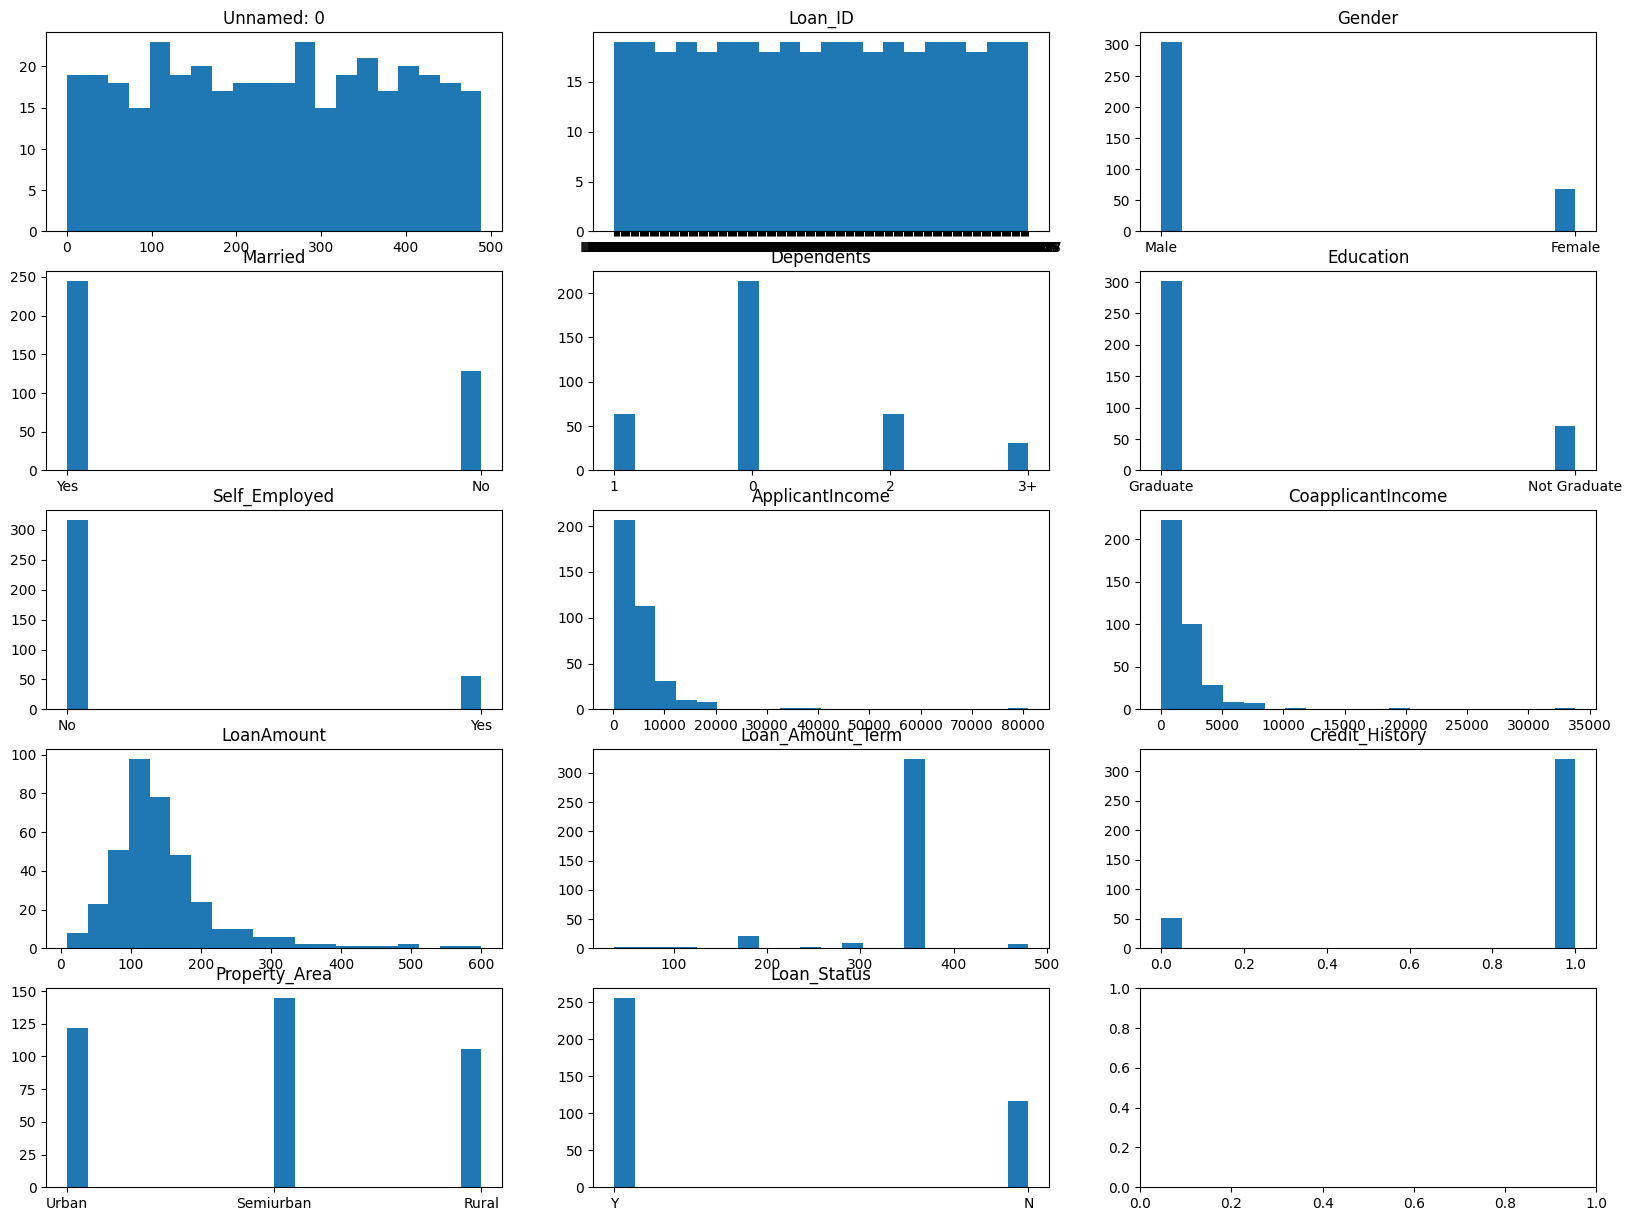

In [365]:
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

nrow = 5
ncol = 3

fig, axes = subplots(nrows=nrow, ncols=ncol, figsize=(20, 15))

i = 0
for name, values in data.items():
    c = i % ncol
    r = i // ncol

    axes[r][c].hist(values, bins=20)
    axes[r][c].set_title(name)

    i += 1


7. What are the different feature types in this data (e.g, continuous vs categorical). Apply
feature encoding if needed. What is the feature transformation you used and why

This dataset has both categorical and continuous feature types.

The continuous columns are:

**Discrete**:
- `Unnamed: 0`

**Continuous**:
- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`
- `Loan_Amount_Term`


The categorical columns are:

**Binary**:
- `Gender`
- `Married`
- `Education`
- `Self_Employed`
- `Credit_History` (already encoded)
- `Loan_Status` (also feature column)

**Ordinal**:
- `Dependents` (in this case it is)

**Nominal**:
- `Property_Area`

Finally there is `Loan_ID` which doesn't really fall into any of the above categories and is mostly used as a way to make sure there are unique values.

For the continuous columns, I need to apply some feature transformation in the form of normalization, since there are appear to be some outliers in these columns.

In [366]:
# standardize the data using z-score
def standardize_zscore(data, skip):

  data_std_zscore = data.copy(deep=True)

  # goes through each column of the data
  for name, values in data_std_zscore.items():
    if name in skip:
      continue

    mean, stdev = values.mean(), values.std()

    # calculates the new standardized scores for the column
    values_new = values.apply(lambda x: (x - mean) / stdev)

    # adds the new score to the dataframe and removes the old ones
    data_std_zscore = data_std_zscore.drop(columns=[name])
    data_std_zscore = pd.concat([data_std_zscore.reset_index(drop=True), values_new], axis=1)

  return data_std_zscore

In [367]:
# we aren't going to standardize the "Unnamed: 0" column since it doesn't have a normal distribution
# or "Loan_Status" since it is the feature column
data = standardize_zscore(data, 
                           ["Unnamed: 0", "Loan_ID", "Gender",
                            "Married", "Dependents", "Education",
                            "Education", "Self_Employed", "Credit_History",
                            "Property_Area", "Loan_Status"])

data

data = data.dropna()
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,LP001518,Male,Yes,1,Graduate,No,1.0,Urban,Y,-0.653164,-0.085324,-1.445536,0.260874
1,1.0,LP002734,Male,Yes,0,Graduate,No,1.0,Urban,Y,0.128136,0.785662,2.275513,0.260874
3,5.0,LP001841,Male,No,0,Not Graduate,Yes,1.0,Rural,Y,-0.258518,-0.585588,-0.610199,0.260874
5,7.0,LP002194,Female,No,0,Graduate,Yes,1.0,Semiurban,Y,-0.475480,0.175164,-0.508946,0.260874
6,8.0,LP001641,Male,Yes,1,Graduate,Yes,0.0,Rural,N,0.076446,-0.585588,-0.078620,0.260874


----------------------------------------------------------------------------------------------------

In [368]:
data.shape

(286, 14)

Then for the feature transformation of the categorical columns, I need to use feature encoding to use numbers rather than strings for later steps. 

In [369]:
def transformFeatures(data):

    data_transformed = data.copy(deep=True)

    # BINARY
    if ('Gender' in data_transformed):
        data_transformed.loc[data_transformed['Gender'] == 'Male', 'Gender'] = 1
        data_transformed.loc[data_transformed['Gender'] == 'Female', 'Gender'] = 0

    if ('Married' in data_transformed):
        data_transformed.loc[data_transformed['Married'] == 'Yes', 'Married'] = 1
        data_transformed.loc[data_transformed['Married'] == 'No', 'Married'] = 0

    if ('Education' in data_transformed):
        data_transformed.loc[data_transformed['Education'] == 'Graduate', 'Education'] = 1
        data_transformed.loc[data_transformed['Education'] == 'Not Graduate', 'Education'] = 0

    if ('Self_Employed' in data_transformed):
        data_transformed.loc[data_transformed['Self_Employed'] == 'Yes', 'Self_Employed'] = 1
        data_transformed.loc[data_transformed['Self_Employed'] == 'No', 'Self_Employed'] = 0


    if ('Loan_Status' in data_transformed):
        data_transformed.loc[data_transformed['Loan_Status'] == 'Y', 'Loan_Status'] = 1
        data_transformed.loc[data_transformed['Loan_Status'] == 'N', 'Loan_Status'] = 0


    # ORDINAL
    if ('Dependents' in data_transformed):    
        data_transformed.loc[data_transformed['Dependents'] == '3+', 'Dependents'] = 3
        data_transformed.loc[data_transformed['Dependents'] == '2', 'Dependents'] = 2
        data_transformed.loc[data_transformed['Dependents'] == '1', 'Dependents'] = 1
        data_transformed.loc[data_transformed['Dependents'] == '0', 'Dependents'] = 0


    # NOMINAL
    if ('Property_Area' in data_transformed):
        data_transformed.loc[data_transformed['Property_Area'] == 'Rural', 'Property_Area'] = 0
        data_transformed.loc[data_transformed['Property_Area'] == 'Semiurban', 'Property_Area'] = 1
        data_transformed.loc[data_transformed['Property_Area'] == 'Urban', 'Property_Area'] = 2

    return data_transformed

In [370]:
data = transformFeatures(data)

Now, I will remove the `Loan_ID` column because its value is meaningless and is just used as an identifier.

In [371]:
data.drop('Loan_ID', axis=1, inplace=True)

In [372]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,1,1,1,1,0,1.0,2,1,-0.653164,-0.085324,-1.445536,0.260874
1,1.0,1,1,0,1,0,1.0,2,1,0.128136,0.785662,2.275513,0.260874
3,5.0,1,0,0,0,1,1.0,0,1,-0.258518,-0.585588,-0.610199,0.260874
5,7.0,0,0,0,1,1,1.0,1,1,-0.475480,0.175164,-0.508946,0.260874
6,8.0,1,1,1,1,1,0.0,0,0,0.076446,-0.585588,-0.078620,0.260874


We can examine the data now that it has been transformed:

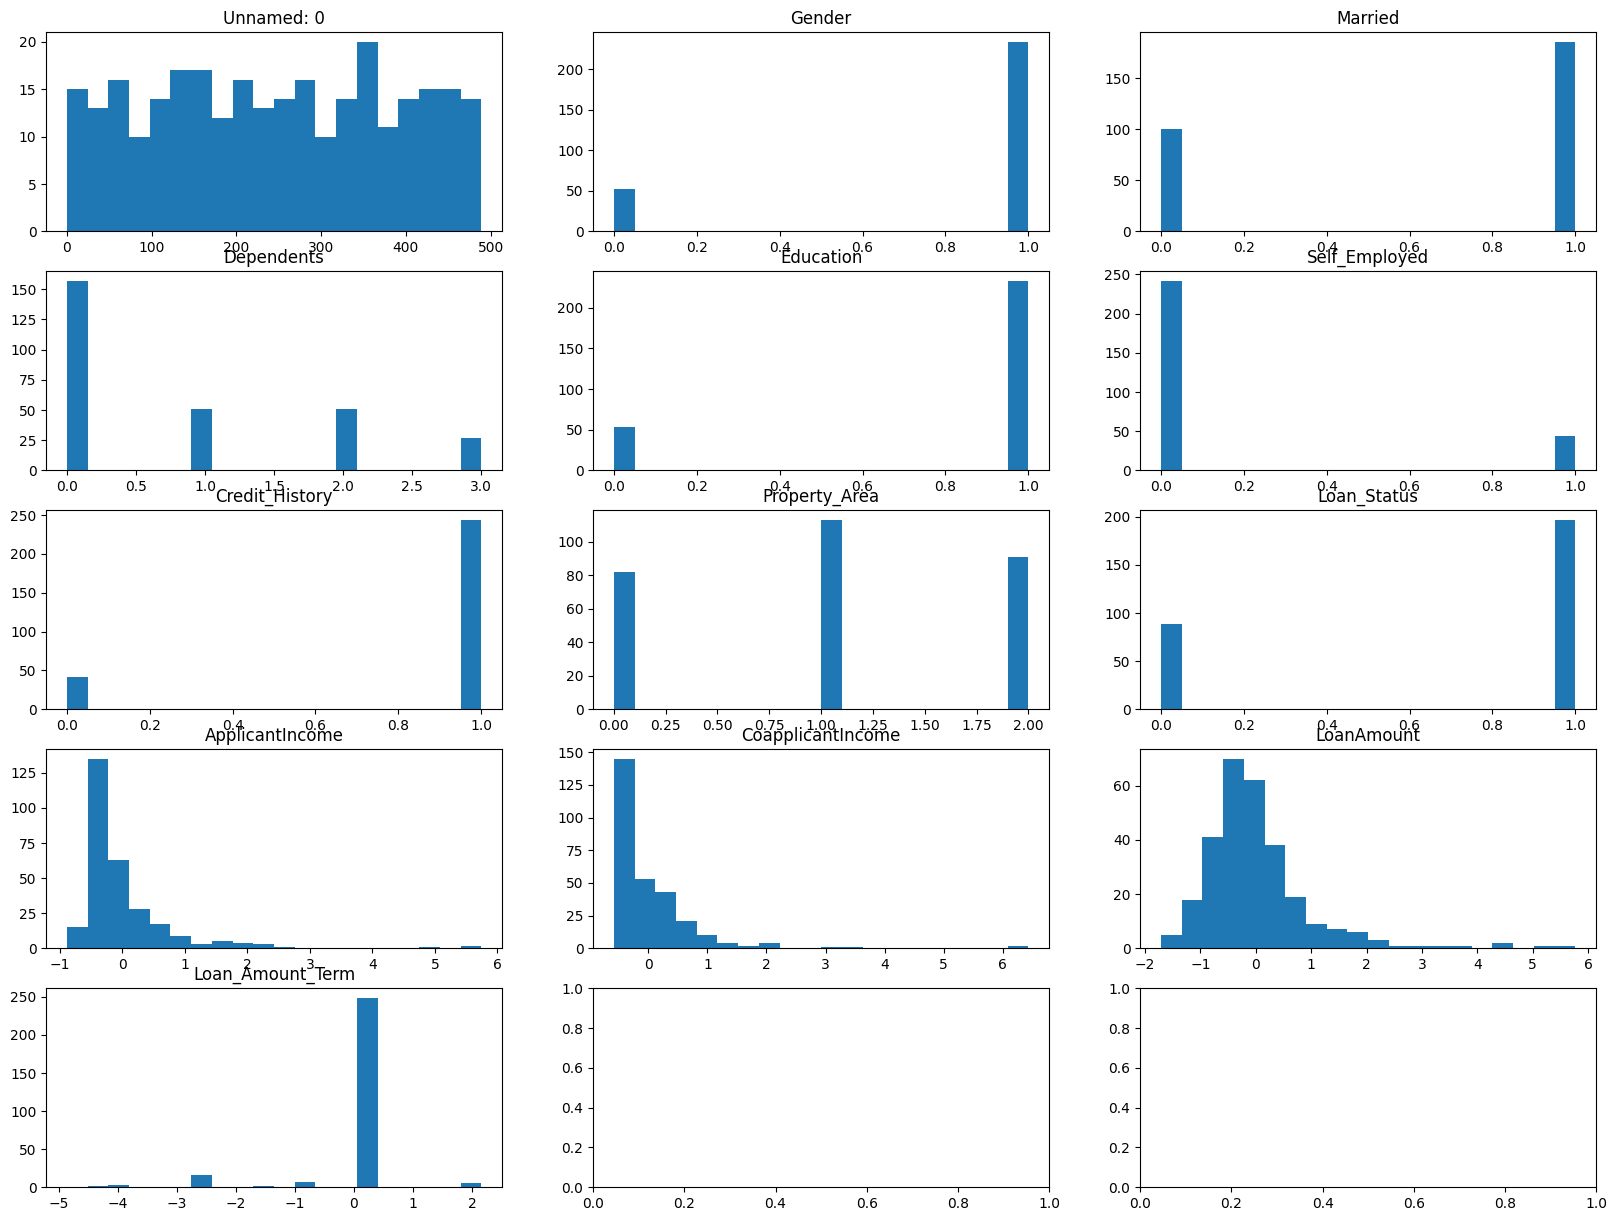

In [373]:
fig, axes = subplots(nrows=nrow, ncols=ncol, figsize=(20, 15))

i = 0
for name, values in data.items():
    c = i % ncol
    r = i // ncol

    axes[r][c].hist(values, bins=20)
    axes[r][c].set_title(name)

    i += 1

#### A-2 Implementation

1. Using the data you pre-processed above, implement a classification tree from scratch for
prediction. You are NOT allowed to use machine learning libraries for the tree model.

In [374]:
from collections import Counter

import numpy as np

# in class we used entropy
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

def giniIndex(y):
    values, hist = np.unique(y, return_counts=True)
    ps = hist / len(y)

    return 1.0 - np.sum([ps**2])    

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_gini = giniIndex(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        g_l, g_r = giniIndex(y[left_idxs]), giniIndex(y[right_idxs])
        child_gini = (n_l / n) * g_l + (n_r / n) * g_r

        # information gain is difference in loss before vs. after split
        ig = parent_gini - child_gini
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

2. Build the tree model using training data and Gini Index as the splitting criteria. Validate
the trained model with validation data.

In [375]:
!{sys.executable} -m pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [376]:
X = np.asarray(data.drop(columns=[label_column]).values.tolist(), dtype=np.longdouble)
y = np.asarray(data[label_column].values.tolist(), dtype=np.longdouble)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [377]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [378]:
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)
acc = accuracy(y_valid, y_pred)

print("Accuracy:", acc)

Accuracy: 0.7413793103448276


3. Using the trained model, conduct inference on the test data and save the predicted result
in a separate file called `FirstName_LastName_preds.csv` with the column name `pred_tree`.

In [379]:
data_test = pd.read_csv('data_test.csv')
data_test

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP002364,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban
1,1,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban
2,2,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
3,3,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural
4,4,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban
119,119,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural
120,120,LP002544,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural
121,121,LP001868,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban


Now to normalize and transform the test data

In [380]:
# normalize data
data_test = standardize_zscore(data_test, 
                           ["Unnamed: 0", "Loan_ID", "Gender",
                            "Married", "Dependents", "Education",
                            "Education", "Self_Employed", "Credit_History",
                            "Property_Area"])

In [381]:
# transform data
data_test = transformFeatures(data_test)

In [382]:
# remove 'Loan_ID'
data_test.drop('Loan_ID', axis=1, inplace=True)


data_test

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,1,0,1,0,1.0,1,1.950294,-0.830856,-0.605934,0.314918
1,1,1,1,0,0,0,1.0,1,-0.230022,-0.830856,-0.381870,-2.283158
2,2,1,1,3,1,0,1.0,0,-0.246744,-0.830856,-1.266336,-2.283158
3,3,1,1,2,1,0,0.0,0,-0.402947,0.263621,0.030881,0.314918
4,4,1,1,2,1,0,1.0,1,0.190462,0.254020,0.738455,0.314918
...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,0,1,1,1,0,1.0,1,1.363004,-0.830856,4.111220,0.314918
119,119,1,0,0,1,0,0.0,0,0.195967,-0.830856,-0.346491,0.314918
120,120,1,1,1,0,0,1.0,0,-0.684765,0.728293,-0.193183,0.314918
121,121,1,0,0,1,0,1.0,1,-0.663965,0.583003,-0.157805,0.314918


In [383]:
pd.isnull(data_test).sum() 

Unnamed: 0           0
Gender               1
Married              0
Dependents           2
Education            0
Self_Employed        3
Credit_History       7
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     2
dtype: int64

It looks like we have some NAs in the test data. In order to have the same number of rows for the output of the assignment, we cannot drop the NAs. Instead, we will record the rows with NAs and set them to 0 for now. Then make any rows with NA in them be NA in the result column later.

In [384]:
# Get rows with NaN values
rows_with_na = data_test[data_test.isna().any(axis=1)]

data_test = data_test.fillna(0)

C:\Users\peica\AppData\Local\Temp\ipykernel_23636\960982678.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test = data_test.fillna(0)


In [385]:
pd.isnull(data_test).sum() 

Unnamed: 0           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [386]:
rows_with_na.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
6,6,1,1,0,0,0,1.0,2,-0.594632,1.601314,NaN,-2.283158
9,9,NaN,1,3,1,0,1.0,0,3.769876,-0.830856,2.625316,0.314918
11,11,1,1,NaN,0,0,0.0,1,-0.457189,0.321225,-0.287527,0.314918
21,21,1,1,1,1,0,0.0,0,-0.075654,-0.830856,NaN,0.314918
24,24,1,1,2,1,0,1.0,2,-0.483087,0.195136,NaN,0.314918


In [387]:
X_test = np.asarray(data_test.values.tolist())

predictions = clf.predict(X_test)
predictions = pd.DataFrame(predictions, columns=['pred_tree'])

In [388]:
predictions.loc[rows_with_na.index, 'pred_tree'] = np.nan
predictions.head(10)

,pred_tree
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,NaN
7,1.0
8,1.0
9,NaN


In [389]:
predictions.to_csv('Casey_Pei_preds.csv', index=False)

4. Below are the steps you may want to consider.

> Define a splitting criteria:
1. this criteria assigns a score to a split.

> Create the split:
1. split the dataset by iterating over all the rows and feature columns;
2. evaluate all the splits using the splitting criteria;
3. choose the best split.

> Build the tree:
1. decide when to stop growing (when the tree reaches the maximum allowed depth or when a leaf is empty or has only 1 element);
2. split recursively by calling the same splitting function;
3. create a root node and apply recursive splitting.

> Predict with the tree:
1. For a given data point, make a prediction using the tree.

### Part B - Boosting (30 points)

Now that we implemented classification trees in part A, we would like to use a decision-
tree-based ensemble Machine Learning algorithm for `Loan_Dataset`. You can use the same
pre-processed dataset as part A.

1. Define a function `train_XGBoost` to use an `XGBoost` model with L2 regularization that
returns a dictionary. The keys of the returned dictionary would be the lambda parameter
(for L2 regularization) and the corresponding value is the mean AUC of 10 fold cross
validation. Use the following lambda parameters: `[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]`.
Describe the process of finding the optimal `lambda value` for l2 regularization

In [390]:
!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier, cv
from sklearn.model_selection import cross_val_score, KFold, cross_validate


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [391]:
import numpy as np
import xgboost as xgb

def train_XGBoost(X, y, lambdas):
    
    results = {}
    
    # 10 cross-validation for each lambda value
    for lmbda in lambdas:

        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'reg_lambda': lmbda,
        }
        
        cv_results = xgb.cv(params, dtrain=xgb.DMatrix(X, label=y),
                            num_boost_round=10, nfold=10, metrics='auc',
                            seed=123, early_stopping_rounds=5)
        
        mean_auc = cv_results['test-auc-mean'].iloc[-1]
        results[lmbda] = mean_auc
        
    return results


In [392]:
lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

results = train_XGBoost(X, y, lambdas)

In [393]:
for lmbda, auc in results.items():
    print(f"lambda: {lmbda} - auc: {auc}")

lambda: 0.001 - auc: 0.7035719102841191
lambda: 0.01 - auc: 0.7086667806294559
lambda: 0.1 - auc: 0.707165303122844
lambda: 1 - auc: 0.735147191669123
lambda: 10.0 - auc: 0.7335445231417579
lambda: 100.0 - auc: 0.7106075861451994
lambda: 1000.0 - auc: 0.6755823236998844


The closer AUC is to 1, the better, so it seems that a lambda of 1 -- which is just above 10.0 is the best.

2. Train and test the model with the best parameters you found

In [401]:
xgb_model = XGBClassifier(reg_lambda=1)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_valid)
acc_xgb = accuracy(y_valid, y_pred_xgb)

print("Accuracy:", acc_xgb)

Accuracy: 0.7241379310344828


3. Plot the ROC curve for the `XGBoost` model on validation data and also print the area
under the curve. Include axes labels, legend, and title in the Plot.

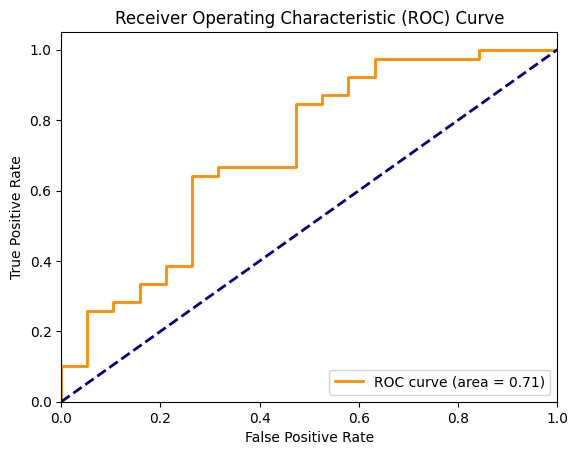

Area under the ROC curve: 0.7125506072874495


In [402]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# print AUC
print("Area under the ROC curve:", roc_auc)


4. Compare the validation result you obtained using `XGBoost` with the results using the tree
you implemented in part A. Which model did perform better and why?

In [403]:
# get auc for pt A tree
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_valid, y_pred)
roc_auc_clf = auc(fpr_clf, tpr_clf)

print(f"Part A's decision tree's AUC: {roc_auc_clf}")
print(f"Part B's boosted tree's AUC {roc_auc}")

Part A's decision tree's AUC: 0.6862348178137653
Part B's boosted tree's AUC 0.7125506072874495


The model obtained using `XGBoost` performed better because we were able to optimize it by testing different lambda values and seeing which produced the best AUC score.

In [404]:
def balanced_accuracy(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    
    # calculate TPR for each class
    sensitivity_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    balanced_acc = (sensitivity_0 + sensitivity_1) / 2
    
    return balanced_acc


In [405]:
print(f"Part A's decision tree's balanced accuracy: {balanced_accuracy(y_valid, y_pred)}")
print(f"Part B's boosted tree's balanced accuracy {balanced_accuracy(y_valid, y_pred_xgb)}")

Part A's decision tree's balanced accuracy: 0.6862348178137652
Part B's boosted tree's balanced accuracy 0.6734143049932524


Comparing the balanced accuracies of the two trees, part A's tree performed better. However, since the two accuracies are still rather close together while the part B's tree has still a much higher AUC, we will conclude that part B's tree is overall more performant.

5. Using the trained model, conduct inference on the test data and save the predicted result
into the predictions csv file with `pred_xgboost` as the column name.

In [399]:
predictions['pred_xgboost'] = xgb_model.predict(X_test)

predictions.loc[rows_with_na.index, 'pred_xgboost'] = np.nan
predictions.head(10)

,pred_tree,pred_xgboost
0,1.0,1.0
1,1.0,1.0
2,0.0,1.0
3,0.0,0.0
4,1.0,1.0
5,1.0,1.0
6,NaN,NaN
7,1.0,1.0
8,1.0,1.0
9,NaN,NaN


In [400]:
predictions.to_csv('Casey_Pei_preds.csv', index=False)